# Práctica 3.A - Perceptrón Multicapa

Hecho por:
- Jaime Benedi
- Miguel Sevilla


Hay que generar unos datos sobre conjuntos de puntos con valores de presión arterial y colesterol,
clasificando entre tener riesgo cardiovascular (1) o no (0), como hicimos en la práctica anterior.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Genera una gran cantidad de puntos aleatorios (presión arterial y colesterol) y muestra los
resultados en una gráfica, utilizando diferentes dibujos para cada punto.

In [142]:
def plot_data(x1, x2, y, label1, label2, title) :
    plt.scatter(x1[y == 1], x2[y == 1], c='black', marker='x', label='Alto Riesgo (1)',)
    plt.scatter(x1[y == 0], x2[y == 0], c='red', marker='o', label='Bajo Riesgo (0)')
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title(title)
    plt.legend(["Alto Riesgo (1)", "Bajo Riesgo (0)"])

In [143]:
def arterial_pressure_risk(x) -> float:
        if (x < 100) :
            return (50 + (100-x))/70
        elif (x > 120) :
            return (x - 100) / 50
        else :
            return (x - 100) / 100
        
def colestherol_risk(x) -> float:
        return (x - 180) / 50
        
def gen_data(size) :
    xPres = np.random.normal(110, min(110-70, 180-110)-5, size)
    xCol = np.random.normal(160, min(160-120, 250-160)-5, size)
    
    # polinomio de los pesos de las probabilidades
    probRiesgo = np.vectorize(arterial_pressure_risk)(xPres) + colestherol_risk(xCol)
    # consideremos en riesgo a todas aquellas personas con una probabilidad acumulada mayor a un medio
    riesgo = (probRiesgo > 0.5).astype(int)
    
    return xPres, xCol, riesgo

In [144]:
poblacion = 3000
x1, x2, y = gen_data(poblacion)

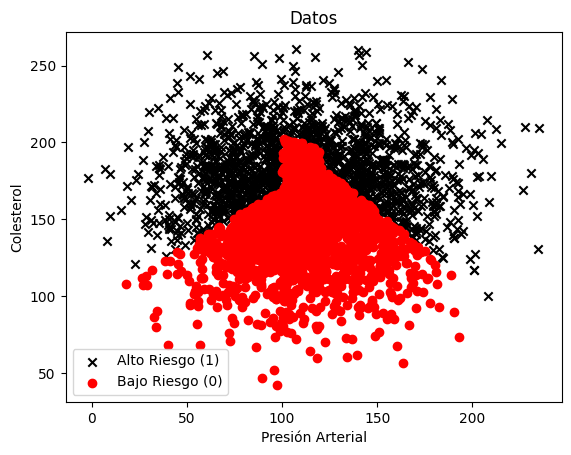

In [145]:
plot_data(x1, x2, y, "Presión Arterial", "Colesterol", "Datos")

2. Divide el conjunto de datos en entrenamiento y evaluación como consideres.

In [146]:
x = np.array([x1, x2]).T
scaler = MinMaxScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(scaled_x, y, test_size=0.2)

3. Entrena una red neuronal con el conjunto de entrenamiento.

In [ ]:
modelo = MLPClassifier(hidden_layer_sizes=(100), max_iter=5000, random_state=42, activation='relu', solver='lbfgs', learning_rate_init=0.1, alpha=0.0001)
modelo.fit(xTrain, yTrain)

MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.1, max_iter=5000,
              random_state=42, solver='lbfgs')

4. Aplica el modelo entrenado sobre el conjunto de evaluación

In [148]:
predicciones = modelo.predict(xTest)

5. Muestra los resultados aplicados sobre el conjunto de evaluación. Se puede mostrar una
gráfica como la anterior: puntos (presión arterial y colesterol) y su clasificación con MLP
pintado de diversa manera (e.g. “x” o círculos).

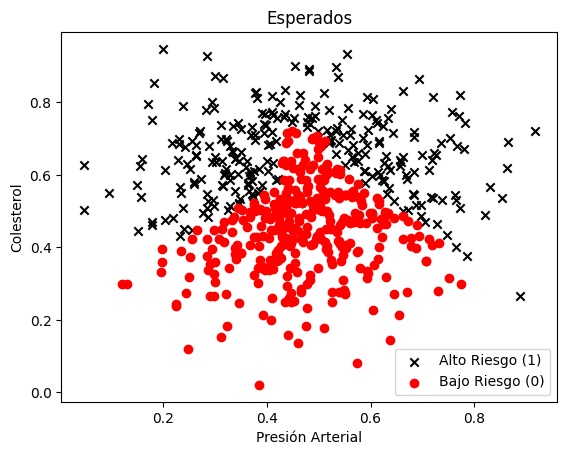

In [ ]:
plot_data(xTest[:, 0], xTest[:, 1], yTest, "Presión Arterial", "Colesterol", "Esperados")

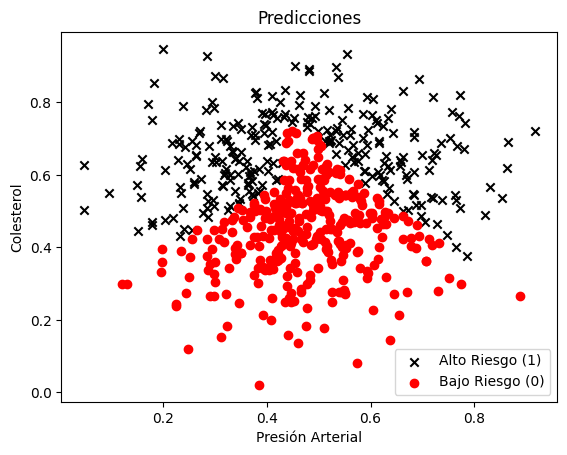

In [150]:
plot_data(xTest[:, 0], xTest[:, 1], predicciones, "Presión Arterial", "Colesterol", "Predicciones")

6. Usa las métricas precisión y recall estudiadas en clase para evaluar la clasificación

In [ ]:
accuracy = precision_score(yTest, predicciones)
print(f"Accuracy: {accuracy:.2f}")

recall = recall_score(yTest, predicciones)
print(f"Recall: {recall:.2f}")

Accuracy: 0.99
Recall: 1.00


7. Para evitar “overfitting” habría que entrenar y validar los datos con conjuntos diferentes y con
configuraciones de la red distintas. Prueba a mejorar la precisión de la red neuronal
cambiando algunos de sus parámetros que has aprendido y haciendo distintas particiones del
dataset. Se deben probar al menos dos configuraciones distintas.

In [152]:
modelos = []
muestras = []
layer = [(100,10), (70, 30)]
alphas :np.ndarray = [0.001, 0.25]
learning_rate :np.ndarray = [0.1, 0.25]
testSizes : np.ndarray = [0.33, 0.45]

for i in range(2) :
    xTr, xTs, yTr, yTs = train_test_split(scaled_x, y, test_size=testSizes[i])
    muestras.append((xTr, xTs, yTr, yTs))
    
    mlp = MLPClassifier(layer[i], alpha=alphas[i], learning_rate_init=learning_rate[i], max_iter=5000)
    mlp.fit(xTr, yTr)
    
    modelos.append(mlp)

8. Calcula la precisión para cada una de las configuraciones realizadas en el punto anterior.
Dibuja también sus gráficas.

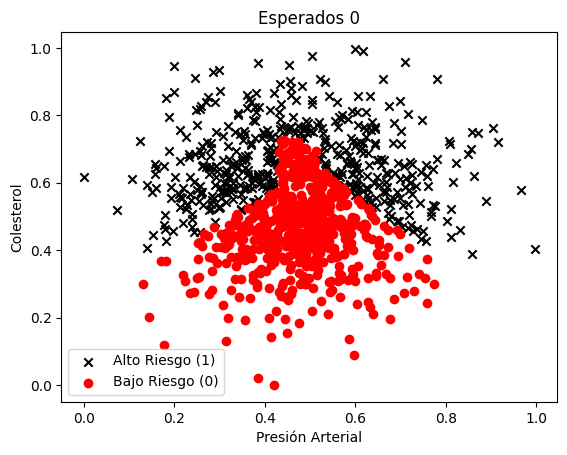

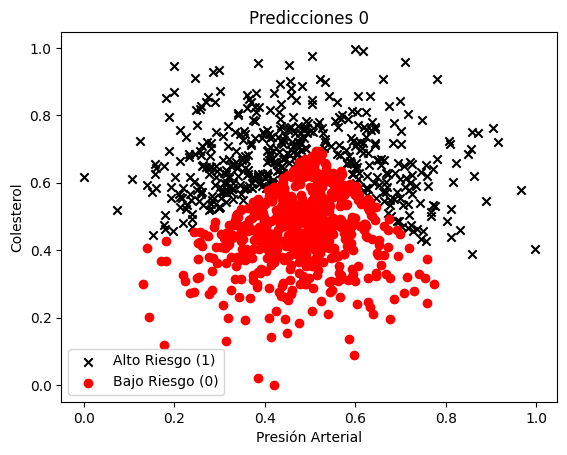

Accuracy: 0.94
Recall: 0.89


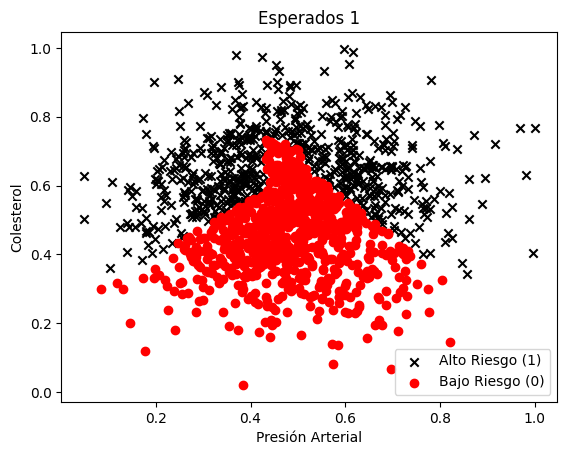

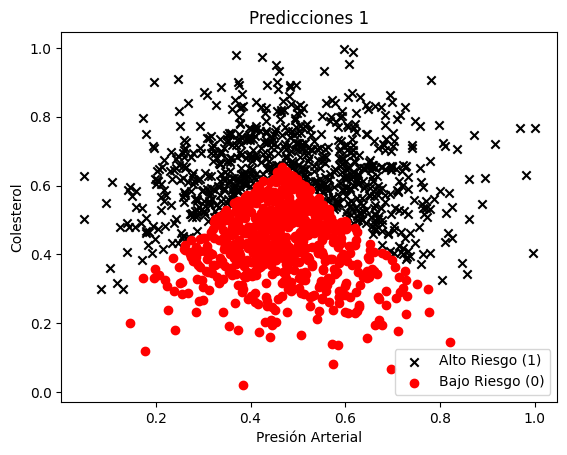

Accuracy: 0.82
Recall: 0.97


<Figure size 640x480 with 0 Axes>

In [153]:
for i in range(len(modelos)) :
    (xTr, xTs, yTr, yTs) = muestras[i]
    
    prediccion = modelos[i].predict(xTs)
    
    plot_data(xTs[:, 0], xTs[:, 1], yTs, "Presión Arterial", "Colesterol", f"Esperados {i}")
    plt.show()
    plt.clf()
    
    plot_data(xTs[:, 0], xTs[:, 1], prediccion, "Presión Arterial", "Colesterol", f"Predicciones {i}")
    plt.show()
    plt.clf()
    
    accuracy = precision_score(yTs, prediccion)
    print(f"Accuracy: {accuracy:.2f}")

    recall = recall_score(yTs, prediccion)
    print(f"Recall: {recall:.2f}")

9. Discute los resultados y determina cuál es la mejor configuración de todas las estudiadas.